AMAZON-Products-2023 dataset- https://huggingface.co/datasets/Studeni/AMAZON-Products-2023

Contains a mix of text, tabular, and image data related to Amazon product listings. The dataset includes 117k rows and provides rich metadata, embeddings, and structured information about products.

Key Features in the Dataset:

*   Product Information: title, description, categories, features, details
*   Metadata: date_first_available, store, main_category
*   Ratings & Price: average_rating, rating_number, price
*   Embeddings: Precomputed vector representations of text/image
*   Image URLs: Links to product images
*   Tabular Data: Parquet format for easy processing

### Import Package

In [ ]:
# mount with drive
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/LOreal x DSI Capstone Multi-Modal Search Project/Codes

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1p1uKO-oGnQ0lsmvP5VZ7hzY5F6QrBEiA/LOreal x DSI Capstone Multi-Modal Search Project/Codes


In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 25.9 MB/s eta 0:00:00


In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import numpy as np
import pandas as pd
import faiss
import torch
from transformers import CLIPProcessor, CLIPModel, BlipProcessor, BlipModel
from PIL import Image
import requests
from sentence_transformers import SentenceTransformer
from IPython.display import Image, display
from sklearn.metrics.pairwise import cosine_similarity

We can now jump to "Load FAISS" section if the embedding was done and saved as FAISS files.

### Import Data

In [ ]:
# !pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == 

In [ ]:
data = pd.read_csv("data/Amazon2023DS_partial_NLP.csv")

In [ ]:
data.head()

,Unnamed: 0,parent_asin,date_first_available,title,description,filename,main_category,categories,store,average_rating,rating_number,price,features,details,embeddings,image,__index_level_0__,extracted_keywords
0,4447,B0BVHDL9LM,2023-02-11,Remelon Women Long Sleeve Shiny Glitter Dress ...,Remelon Sexy ladies Solid Sequin Glitzy See Th...,meta_Amazon_Fashion,AMAZON FASHION,[],Remelon,3.5,1619.0,45.99,"['90% Polyester, 10% Spandex', 'Imported', 'Pu...","{'Department': 'womens', 'Date First Available...","[0.06406192, 0.034607917, 0.021233289, -0.0185...",https://m.media-amazon.com/images/I/611EUuNhUB...,12018,"Waist, Hip, Sleeve, Bust, Length, XXL, Sexy, S..."
1,4465,B09L8K1RDM,2023-04-03,Hatop Men's Waterproof Jacket Winter Long-Slee...,Men's Fall Winter Coat/Jacket/Outwear\nDeliver...,meta_Amazon_Fashion,AMAZON FASHION,[],Hatop,1.0,1.0,17.99,"['Mens coat/outwear', '🚀Expedited Shipping usu...",{'Item model number': 'Clearance!Hot Sale!Chea...,"[0.010837115, 0.0407998, -0.048764363, -0.0067...",https://m.media-amazon.com/images/I/61QQ+JIYOw...,12123,"Size, Jacket, Bust, Shoulder, Length, Sleeve, ..."
2,4425,B0BYVSFBRW,2023-02-06,HOLDINA Womens Gloves with Touchscreen Fingers...,Touchscreen Texting: Winter gloves thumb and f...,meta_Amazon_Fashion,AMAZON FASHION,[],HOLDINA,4.7,788.0,11.99,"['Pull On closure', 'Hand Wash', ""Touchscreen ...","{'Department': 'Women', 'Date First Available'...","[0.029688071, 0.0018087695, -0.014146801, 0.01...",https://m.media-amazon.com/images/I/812mTIf8b0...,11933,"gloves, fingers, Winter, warm, Texting, lined,..."
3,4838,B0195HSK1O,2023-09-12,Dickies Mens Reversible Stitched 35mm Genuine ...,Get two looks of one belt. This genuine leathe...,meta_Amazon_Fashion,AMAZON FASHION,[],Dickies,3.0,1.0,NaN,"['100% Genuine leather', 'Reversible to black ...","{'Date First Available': 'September 12, 2023'}","[0.03541416, 0.03816181, 0.021535004, -0.00407...",https://m.media-amazon.com/images/I/41aXHKJQHz...,14298,"brown, black, Double, Dickies, belt, genuine, ..."
4,4817,B0C1YV98X2,2023-04-10,"Travel Sunglass Organizer, Foldable Sunglass C...",Are you often in a rush to leave your home and...,meta_Amazon_Fashion,AMAZON FASHION,[],Xisudro,4.5,3.0,30.99,"['PU Leather', 'Imported', 'Button closure', '...",{'Package Dimensions': '7.4 x 5.24 x 5.2 inche...,"[-0.013072559, 0.02270317, -0.035718743, -0.01...",https://m.media-amazon.com/images/I/71vL8Pnyyh...,14210,"sunglasses, pairs, glasses, organizer, store, ..."


In [ ]:
data.categories.value_counts()

,count
categories,
[],248
"['Cell Phones & Accessories', 'Cases, Holsters & Sleeves', 'Basic Cases']",234
"['Clothing, Shoes & Jewelry', 'Novelty & More', 'Clothing', 'Novelty', 'Men', 'Shirts', 'T-Shirts']",135
"['Home & Kitchen', 'Wall Art', 'Posters & Prints']",104
"['Clothing, Shoes & Jewelry', 'Women', 'Jewelry', 'Necklaces', 'Pendant Necklaces']",95
...,...
"['Video Games', 'Legacy Systems', 'Nintendo Systems', 'Game Boy Systems', 'Game Boy', 'Consoles']",1
"['Video Games', 'Virtual Reality', 'Standalone Hardware', 'Accessories']",1
"['Video Games', 'PlayStation 4']",1


In [ ]:
!pip install wordcloud

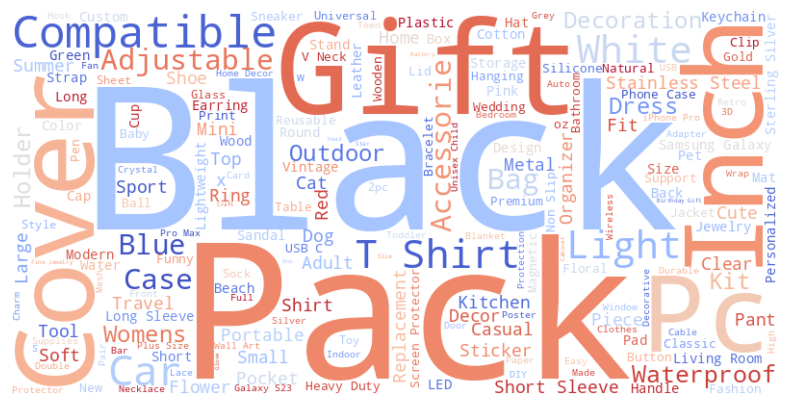

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text into a single string
text_data = " ".join(data["title"])

# Add custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["Men", "Women", "Girl", "Set", "Girls", "Kid", "Kids", "Boy", "Boys", "Mens"])

# Generate word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color="white",
    stopwords=custom_stopwords, colormap="coolwarm"
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
# Some rows have no extracted keywords due to lack of information in descriptions and features in the original dataset
data[data.combined_text.isna()]

,Unnamed: 0,parent_asin,date_first_available,title,description,filename,main_category,categories,store,average_rating,rating_number,price,features,details,embeddings,image,__index_level_0__,extracted_keywords,combined_text
247,38926,B0737KL3C8,2023-07-14,Silver Plain Bezel Wire 26 Gauge 1/8 Inch x 24...,1,meta_Arts_Crafts_and_Sewing,Industrial & Scientific,"['Arts, Crafts & Sewing', 'Beading & Jewelry M...",HAPAW,4.9,21.0,NaN,['1'],"{'Color': 'White1162', 'Gauge': '26.0', 'Item ...","[0.048663303, -0.023256013, -0.030389836, -0.0...",https://m.media-amazon.com/images/I/319DT+a2fo...,99462,NaN,NaN
272,39919,B0BZNDMFRM,2023-03-27,VONBOR Diamond Painting YG065,1,meta_Arts_Crafts_and_Sewing,NaN,"['Arts, Crafts & Sewing', 'Painting, Drawing &...",VONBOR,5.0,1.0,9.99,['1'],"{'Brand': 'VONBOR', 'Age Range (Description)':...","[-0.015011501, 0.017399998, 0.014731286, 0.018...",https://m.media-amazon.com/images/I/71YOgkO-kE...,101533,NaN,NaN
435,34069,B0CJCS2193,2023-08-28,AED Backpack Waterproof Kit Easy Operation for...,1,meta_Automotive,Camera & Photo,"['Automotive', 'Motorcycle & Powersports', 'Ac...",bolarstore,4.9,45.0,2499.00,[],"{'Date First Available': 'August 28, 2023', 'M...","[0.016899733, -0.0017308795, 0.014958218, 0.01...",https://m.media-amazon.com/images/I/71E1XiD2zp...,88892,NaN,NaN
533,32061,B075MGLBVM,2023-07-08,Set of 2 Rear Upper Shock Mounts OEM LEMFORDER...,1,meta_Automotive,Health & Personal Care,"['Automotive', 'Replacement Parts', 'Shocks, S...",Faittd,4.9,170.0,79.99,['1'],"{'Color': 'Gen**54', 'Brand': 'Flend.', 'Unit ...","[-0.0039437846, -0.06418606, -0.028529758, 0.0...",https://m.media-amazon.com/images/I/71YONBzGiH...,84361,NaN,NaN
566,32431,B0918K6YMW,2023-04-19,AYATANA Black License Plate Frame Covers Holde...,11,meta_Automotive,Automotive,"['Automotive', 'Exterior Accessories', 'Licens...",AYATANA,4.6,84.0,NaN,"['11', '11', '11', '11', '11']","{'Manufacturer': 'Ice It', 'Brand': 'AYATANA',...","[0.030770442, -0.009114671, -0.0012895083, 0.0...",https://m.media-amazon.com/images/I/71eg2KUUOW...,85245,NaN,NaN
729,33417,B0C4LNYBW6,2023-01-02,Touch-Up-Paint-for-Cars Car-Paint-Scratch-Repa...,2,meta_Automotive,Tools & Home Improvement,"['Automotive', 'Paint & Paint Supplies', 'Pain...",MGDYSS,4.0,3.0,NaN,[],"{'Brand': 'MGDYSS', 'Color': 'Black', 'Finish ...","[0.034466602, 0.0123520605, -0.0015726533, 0.0...",https://m.media-amazon.com/images/I/71OB6bCgxe...,87565,NaN,NaN
1584,47628,B0BGP1QWMD,2023-03-20,Miracase Designed for iPhone 14 Plus Case Black,1,meta_Cell_Phones_and_Accessories,Cell Phones & Accessories,"['Cell Phones & Accessories', 'Cases, Holsters...",Miracase,4.5,29.0,NaN,['1'],{'Best Sellers Rank': {'Cell Phones & Accessor...,"[0.032731052, -0.015405537, -0.011885578, 0.01...",https://m.media-amazon.com/images/I/6169VREAsV...,121890,NaN,NaN
1787,50757,B0BWXTPNTV,2023-03-01,Yiisonger Magnetic Wireless Power Bank,KT-D011,meta_Cell_Phones_and_Accessories,Cell Phones & Accessories,"['Cell Phones & Accessories', 'Accessories', '...",Yiisonger,4.3,25.0,NaN,['KT-D011'],{'Product Dimensions': '0.39 x 0.39 x 0.39 inc...,"[0.019459337, -0.039919287, -0.03315197, -0.00...",https://m.media-amazon.com/images/I/61eydRMBIH...,130338,NaN,NaN
6244,64245,B0BSBZ5FPJ,2023-03-02,Onamicit Wireless Earbuds Bluetooth Headphones...,1,meta_Electronics,All Electronics,"['Electronics', 'Headphones, Earbuds & Accesso...",KRTYLYT,4.5,2.0,NaN,[],"{'Item model number': '1', 'Batteries': '2 Lit...","[0.00857815, -0.0007626511, -0.037700966, 0.01...",https://m.media-amazon.com/images/I/51qCab+mbU...,166271,NaN,NaN
6312,62257,B0C3T3PZ6S,2023-04-28,Bluetooth Headphones True Wireless Earbuds 48H...,123,meta_Electronics,NaN,"['Electronics', 'Headphones, Earbuds & Accesso...",SimpTronic Tech,2.3,5.0,NaN,[],"{'Best Sellers Rank': {'Electronics': 431186, ...","[-0.020490516, -0.0047427947, -0.029339626, -0...",https://m.media-amazon.com/images/I/61xYoXrVLH...,161255,NaN,NaN


### Text Embedding

In [ ]:
# Load CLIP model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
def get_clip_text_embedding(text):
    """Generate text embeddings using CLIP."""
    # Truncate text to the maximum sequence length
    # inputs = clip_processor(text=[text[:77]], return_tensors="pt", truncation=True)
    inputs = clip_processor(text=text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        text_features = clip_model.get_text_features(**inputs)
    return text_features.squeeze().numpy().tolist()

In [ ]:
# Combine title and description
data["combined_text"] = data["title"] + " " + data["extracted_keywords"].fillna("")

# Apply CLIP text embeddings to the combined text
data["text_embedding"] = data["combined_text"].apply(get_clip_text_embedding)

In [ ]:
# Convert embeddings to NumPy arrays
text_embeddings = np.array(data["text_embedding"].tolist(), dtype="float32")

# Create FAISS indices
text_index = faiss.IndexFlatIP(512)   # Cosine similarity for text

# Normalize vectors for cosine similarity
faiss.normalize_L2(text_embeddings)

# Add embeddings to FAISS
text_index.add(text_embeddings)

# Save FAISS indices
faiss.write_index(text_index, "data/clip_text_vector_index_w_NLP_2.faiss")

KeyError: 'text_embedding'

### Image Embedding

In [ ]:
def get_clip_image_embedding(image):
    """Fetch image from URL and generate CLIP embedding."""
    try:
        response = requests.get(image, stream=True, timeout=10)
        image = Image.open(response.raw).convert("RGB")

        inputs = clip_processor(images=image, return_tensors="pt")
        with torch.no_grad():
            image_features = clip_model.get_image_features(**inputs)

        return image_features.squeeze().numpy().tolist()

    except Exception as e:
        print(f"Error processing image {image}: {e}")
        return [0] * 512  # Return zero vector if image retrieval fails

# Apply CLIP image embeddings to product images
data["image_embedding"] = data["image"].apply(get_clip_image_embedding)

Error processing image https://m.media-amazon.com/images/I/81BPxz6u2mL._AC_UL1500_.jpg: HTTPSConnectionPool(host='m.media-amazon.com', port=443): Read timed out. (read timeout=10)
Error processing image https://m.media-amazon.com/images/I/71riXz7ZGvL._AC_SL1500_.jpg: HTTPSConnectionPool(host='m.media-amazon.com', port=443): Read timed out. (read timeout=10)


In [ ]:
# Convert embeddings to NumPy arrays
image_embeddings = np.array(data["image_embedding"].tolist(), dtype="float32")

# Create FAISS indices
image_index = faiss.IndexFlatIP(512)  # Cosine similarity for images

# Normalize vectors for cosine similarity
faiss.normalize_L2(image_embeddings)

# Add embeddings to FAISS
image_index.add(image_embeddings)

# Save FAISS indices
faiss.write_index(image_index, "clip_image_vector_index.faiss")

### Load FAISS (We can start from this step after 1st time embeeding)

In [ ]:
# Reload Product Metadata (No Need to Recompute Embeddings)
data = pd.read_csv("data/Amazon2023DS_partial_NLP.csv")

# Reload FAISS Indices - CLIP
text_index_CLIP = faiss.read_index("data/clip_text_vector_index_w_NLP_2.faiss")
image_index_CLIP = faiss.read_index("data/amazon2023 faiss/clip_image_vector_index.faiss")

# Reload FAISS Indices - SentenseTransformer
text_index_ST = faiss.read_index("data/SBERT_text_vector_index_w_NLP.faiss")

# Reload FAISS Indices - BLIP
text_index_BLIP = faiss.read_index("data/BLIP_text_vector_index_w_NLP.faiss")

# Reload FAISS Indices - SentenseTransformer with image to text
text_index_BLIP_TEXT = faiss.read_index("data/faiss_amazon_index.faiss")

# Load CLIP Model & Processor for Query Encoding
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load Sentence Transformer
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Load Blip model
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipModel.from_pretrained("Salesforce/blip-image-captioning-base")

print("FAISS indices, metadata, and models reloaded successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

`BlipModel` is going to be deprecated in future release, please use `BlipForConditionalGeneration`, `BlipForQuestionAnswering` or `BlipForImageTextRetrieval` depending on your usecase.


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 'text_model.encoder.layer.0.attention.self.key.bias', 'text_model.encoder.layer.0.attention.self.key.weight', 'text_model.encoder.layer.0.attention.self.query.bias', 'text_model.encoder.layer.0.attention.self.query.weight', 'text_model.encoder.layer.0.attention.self.value.bias', 'text_model.encoder.layer.0.attention.self.value.weight', 'text_model.encoder.layer.0.crossattention.output.LayerNorm.bias', 'text_model.

FAISS indices, metadata, and models reloaded successfully!


### Retrieve Similar Products - Combined

In [ ]:
def get_clip_text_embedding(text):
    """Generate CLIP text embedding for a new query."""
    inputs = clip_processor(text=[text], return_tensors="pt")
    with torch.no_grad():
        text_features = clip_model.get_text_features(**inputs)
    return text_features.squeeze().numpy().reshape(1, -1).astype("float32")

def get_sbert_text_embedding(text):
    """Generate sbert text embedding for a new query."""
    embeddings = sbert_model.encode(text, normalize_embeddings=True)

    return embeddings.reshape(1, -1).astype("float32")

def get_blip_text_embedding(text):
    """Generate BLIP text embedding for a single text query."""
    inputs = blip_processor(text=[text], return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        output = blip_model.text_model(**inputs).last_hidden_state[:, 0, :]  # CLS token
    embedding = output.cpu().numpy()
    embedding = embedding / np.linalg.norm(embedding, axis=1, keepdims=True)  # normalize
    return embedding.astype("float32")

def retrieve_similar_products(query_text, k=5, alpha=0.5, text_emb="ST", image_emb="CLIP"):
    """
    Multi-modal search using specified embeddings to find similar products based on both text & image similarity.

    - Uses specified embeddings to search BOTH text FAISS and image FAISS.
    - Combines text similarity and image similarity to rank results.
    - Alpha parameter balances text vs. image influence (0 = pure image search, 1 = pure text search).
    """
    # Search range multipler
    search_num = 50
    search_num_CLIP = 20
    # Compute CLIP text embedding for query (512D)
    query_text_emb_CLIP = get_clip_text_embedding(query_text).reshape(1, -1).astype("float32")
    # Compute SBERT text embedding for query (384D)
    query_text_emb_ST = get_sbert_text_embedding(query_text).reshape(1, -1).astype("float32")
    # Compute BLIP text embedding for query (768D)
    query_text_emb_BLIP = get_blip_text_embedding(query_text).reshape(1, -1).astype("float32")

    # Normalize for cosine similarity
    faiss.normalize_L2(query_text_emb_CLIP)
    faiss.normalize_L2(query_text_emb_ST)
    faiss.normalize_L2(query_text_emb_BLIP)

    global text_distances, text_indices, image_distances, image_indices

    # Step 1: Search Text FAISS
    if text_emb == "CLIP":
      text_distances, text_indices = text_index_CLIP.search(query_text_emb_CLIP, k*search_num)
    elif text_emb == "ST":
      text_distances, text_indices = text_index_ST.search(query_text_emb_ST, k*search_num)
    elif text_emb == "BLIP":
      text_distances, text_indices = text_index_BLIP.search(query_text_emb_BLIP, k*search_num)
    elif text_emb == "BLIP_TEXT":
      text_distances, text_indices = text_index_BLIP_TEXT.search(query_text_emb_ST, k)
      final_results = data.iloc[text_indices[0]].copy()
      final_results["similarity_score"] = text_distances[0]
      return final_results
    else:
      print("The model is not acceptable.")

    # Step 2: Search Image FAISS Using Same Text Query
    if image_emb == "CLIP":
      image_distances, image_indices = image_index_CLIP.search(query_text_emb_CLIP, k*search_num)
    else:
      print("The model is not acceptable.")


    # Step 4: Merge Results & Compute Final Scores
    # Convert indices to a set to remove duplicates
    merged_indices = list(set(text_indices[0]) | set(image_indices[0]))

    # Store scores in a dictionary (to handle duplicate matches)
    similarity_scores = {}
    query_text_emb = {"CLIP": query_text_emb_CLIP, "ST":query_text_emb_ST, "BLIP": query_text_emb_BLIP, "BLIP_TEXT": query_text_emb_ST}.get(text_emb)
    text_index = {"CLIP": text_index_CLIP, "ST":text_index_ST, "BLIP": text_index_BLIP, "BLIP_TEXT": text_index_BLIP_TEXT}.get(text_emb)

    for idx in merged_indices:
      product_text_emb = text_index.reconstruct(int(idx)).reshape(1, -1)
      product_image_emb = image_index_CLIP.reconstruct(int(idx)).reshape(1, -1)

      text_sim = cosine_similarity(query_text_emb, product_text_emb)[0][0]
      image_sim = cosine_similarity(query_text_emb_CLIP, product_image_emb)[0][0]

      similarity_scores[idx] = alpha * text_sim + (1 - alpha) * image_sim

    # Step 5: Rank Results
    sorted_indices = sorted(similarity_scores, key=similarity_scores.get, reverse=True)[:k]

    # Retrieve final ranked products
    final_cols = ["Unnamed: 0", "title",	"description", "categories",	"store",	"average_rating",	"price", 	"features",	"details","image", "extracted_keywords"]
    final_results = data.iloc[sorted_indices][final_cols].copy()
    final_results["similarity_score"] = similarity_scores

    return final_results


### Query Testing

#### Sample - Different weights

In [ ]:
#
sample_query_3 = "silver necklace"

retrieved_results_3 = retrieve_similar_products(sample_query_3, k=5, alpha=0, text_emb="CLIP", image_emb="CLIP") #pure image

retrieved_results_3

,Unnamed: 0,parent_asin,date_first_available,title,description,filename,main_category,categories,store,average_rating,rating_number,price,features,details,embeddings,image,__index_level_0__,extracted_keywords
5264,91814,B0BT81SX43,2023-08-14,ICE CARATS 14k White Gold 26 Inch 1.5mm Round ...,ICECARATS DESIGNER JEWELRY 14K WHITE GOLD 26 I...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",ICE CARATS,4.7,10.0,309.45,"[""HAPPY August 2023 Jewelry Deals Limited Supp...","{'Item Weight': '1 Pounds', 'Department': 'wom...","[0.02615805, -0.0023530456, -0.040279426, 0.02...",https://m.media-amazon.com/images/I/51WJ8Fc6gd...,229362,"Type, Process, ICECARATS, CRAFTSMANSHIP, quali..."
2764,81724,B0C1MBBYFR,2023-04-05,Sterling Silver 1.5mm Spiga Wheat Chain Neckla...,This Wheat Chain (also called SPIGA chain) is ...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",Sabrina Silver,4.3,18.0,15.90,"[""Very Attractive Spiga Chain Necklace it's a ...","{'Department': 'Womens', 'Date First Available...","[-0.0033079286, -0.010620045, -0.0320335, -0.0...",https://m.media-amazon.com/images/I/51QNUkgbIC...,207804,"Chain, SPIGA, Silver, NICKEL, Wheat, Sterling,..."
2196,109122,B0BW3RVQTF,2023-02-17,Meilanduo 925 Sterling Silver SOLID 6MM Miami ...,Real 925 Sterling Silver!! All our silver jewe...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Men', 'Jewelry'...",Meilanduo,5.0,2.0,115.99,['Wear alone with casual or formal attire for ...,{'Package Dimensions': '2.56 x 2.56 x 1.18 inc...,"[0.04497706, 0.007634995, -0.05255098, 0.01370...",https://m.media-amazon.com/images/I/51oMxFafEX...,267332,"Silver, Sterling, jewelry, gift, Wear, skin, R..."
10326,56093,B0BVNNZS2T,2023-03-03,Herm Sprenger Chrome Plated Prong Dog Collar U...,SIZE: Herm. Sprenger training collar with over...,meta_Pet_Supplies,Pet Supplies,[],HS HERM. SPRENGER GERMANY,5.0,2.0,35.49,[],"{'Pattern': 'Solid', 'Material': 'Alloy Steel'...","[0.014045128, 0.00939382, 0.020702884, 0.00200...",https://m.media-amazon.com/images/I/61ltFtadhL...,144016,"collar, Herm, training, SIZE, QUALITY, dogs, l..."
4456,84338,B0BTMF68BL,2023-06-30,ICE CARATS 14k White Gold 14 Inch .5mm Box Cha...,ICECARATS DESIGNER JEWELRY 14K WHITE GOLD 14 I...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",ICE CARATS,4.0,14.0,134.45,"[""HAPPY June 2023 Jewelry Deals Limited Supply...","{'Item Weight': '1 Pounds', 'Department': 'Wom...","[0.019399304, 0.0068863863, -0.047678746, 0.02...",https://m.media-amazon.com/images/I/51qqQDbQAE...,213622,"Type, Process, ICECARATS, CRAFTSMANSHIP, quali..."


In [ ]:
for url in retrieved_results_3["image"].tolist():
    display(Image(url=url, width=200, height=200))

In [ ]:
# Sample query
sample_query_31 = "silver necklace, 925 silver, 14k finish"

retrieved_results_31 = retrieve_similar_products(sample_query_31, k=5, alpha=1, text_emb="CLIP", image_emb="CLIP")

retrieved_results_31

,Unnamed: 0,parent_asin,date_first_available,title,description,filename,main_category,categories,store,average_rating,rating_number,price,features,details,embeddings,image,__index_level_0__,extracted_keywords
2012,91250,B0C2PVFT1B,2023-04-17,"Diamond Necklaces for Women, Double Cross Pend...",Women's Simple & Dainty Layered Cross Satellit...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",Gorvuun,4.2,3.0,13.99,['Layered Necklace Design: This cross necklace...,"{'Department': 'Girls', 'Date First Available'...","[0.047468677, 0.026492594, 0.026937474, 0.0118...",https://m.media-amazon.com/images/I/41YhtHFvMz...,228166,"Necklace, Jewelry, Cross, Instructions, Dainty..."
4978,84264,B0C28BCJ1V,2023-04-12,14K Gold Pendant Necklaces for Women Yellow & ...,🔮Our company has always been committed toprovi...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",Molioaki,3.7,28.0,168.99,[],"{'Department': 'womens', 'Date First Available...","[0.05622233, 0.024990078, -0.015274089, 0.0111...",https://m.media-amazon.com/images/I/71SsS3a1Sw...,213459,"company, committed, toproviding, consumers, hi..."
5676,105547,B002NCJN7E,2023-10-02,925 Sterling Silver Solid Satin Not engraveabl...,Sterling Silver Antiqued 4-way Medal Pendant -...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",JewelryWeb,3.0,1.0,NaN,['WELCOME To Jewelry Web October 2023 Fine Jew...,"{'Is Discontinued By Manufacturer': 'No', 'Ite...","[0.012490317, 0.013148857, -0.026187958, 0.026...",https://m.media-amazon.com/images/I/61eCkEH0xS...,259362,"Element, Item, Width, Sterling, Medal, Antique..."
2845,108479,B0CKBHZP41,2023-10-03,GAMEMEN Necklaces for Women 3mm Link Hop Steel...,Women's Hip Steel Fashion Link Necklace 3mm Ho...,meta_Clothing_Shoes_and_Jewelry,NaN,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",GAMEMEN,5.0,1.0,9.99,['Pendant Size: 2.9*2.1CM Chain Size: 45cm Pen...,"{'Item Weight': '0.18 Ounces', 'Item model num...","[0.0147779295, 0.025267852, -0.033111766, -0.0...",https://m.media-amazon.com/images/I/61nvCir+k4...,265972,"Size, Mom, Pendant, Anniversary, Christmas, ro..."
6097,73625,B0C1K4C35Y,2023-04-05,PORI JEWELERS 18K Gold Plating Over Sterling S...,"For years, Pori Jewelers has been crafting and...",meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",PORI JEWELERS,4.5,290.0,52.99,"['Lobster closure', 'Packaging: Each necklace ...","{'Department': 'Unisex Adult', 'Date First Ava...","[0.0023790116, 0.0050676423, -0.032124557, -0....",https://m.media-amazon.com/images/I/61WB+W6+KW...,189239,"Necklace, Sterling, Silver, Jewelers, Pori, je..."


In [ ]:
for url in retrieved_results_31["image"].tolist():
    display(Image(url=url, width=200, height=200))

In [ ]:
# Sample query
sample_query_31 = "silver necklace, 925 silver, 14k finish"

retrieved_results_31 = retrieve_similar_products(sample_query_31, k=5, alpha=1, text_emb="ST", image_emb="CLIP")

retrieved_results_31

,Unnamed: 0,parent_asin,date_first_available,title,description,filename,main_category,categories,store,average_rating,rating_number,price,features,details,embeddings,image,__index_level_0__,extracted_keywords
3003,110523,B077M6VNPV,2023-03-27,925 Sterling Silver Plat Screw Top Ash Holder ...,ICECARATS DESIGNER JEWELRY 925 STERLING SILVER...,meta_Clothing_Shoes_and_Jewelry,NaN,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",ICE CARATS,3.1,3.0,97.45,"[""HAPPY March 2023 Jewelry Deals Limited Suppl...","{'Item Weight': '1 Pounds', 'Item model number...","[0.04601555, -0.00047829168, -0.036956783, 0.0...",https://m.media-amazon.com/images/I/411BDDBdgp...,270502,"Element, Type, STERLING, ICECARATS, CRAFTSMANS..."
5042,76565,B0BT81YMR4,2023-06-03,925 Sterling Silver 2.5mm Rolo Chain Necklace ...,ICECARATS DESIGNER JEWELRY 925 STERLING SILVER...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",ICE CARATS,5.0,3.0,89.45,"[""HAPPY June 2023 Jewelry Deals Limited Supply...","{'Item Weight': '1 Pounds', 'Department': 'Wom...","[0.030431993, 0.006603837, -0.06039144, 0.0150...",https://m.media-amazon.com/images/I/31ssAmR2BI...,196283,"Type, STERLING, ICECARATS, CRAFTSMANSHIP, qual..."
5747,88641,B075ZJ743Q,2023-07-16,14k Gold Yellow Finish 8.3mm Shiny Sparkle Cut...,14k Gold Yellow Finish 8.3mm Shiny Sparkle-Cut...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",JewelryWeb,4.0,1.0,NaN,['WELCOME To Jewelry Web July 2023 Fine Jewelr...,"{'Is Discontinued By Manufacturer': 'No', 'Ite...","[-0.0037057274, 0.049694546, -0.04327457, -0.0...",https://m.media-amazon.com/images/I/418ZlmMbte...,222771,"jewelry, Gold, Love, Yellow, Inch, FREE, Neckl..."
4818,88726,B0BYSTHKD2,2023-03-14,FINEROCK 1/4 Carat Diamond Heart Pendant Neckl...,A heartfelt gift for your near and dear ones. ...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",FINEROCK,3.9,13.0,109.99,['Diamond Weight Variance can be +/- 0.02 cara...,{'Package Dimensions': '2.5 x 2.5 x 2 inches; ...,"[0.0010974497, 0.004954793, -0.032420617, 0.01...",https://m.media-amazon.com/images/I/61mJwOV1Ee...,222941,"Sterling, Silver, diamonds, heartfelt, dear, S..."
2122,74508,B0BTMFT29D,2023-05-30,925 Sterling Silver 10.5mm Double Link Charm B...,ICECARATS DESIGNER JEWELRY 925 STERLING SILVER...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Women', 'Jewelr...",ICE CARATS,4.5,10.0,119.45,"[""HAPPY May 2023 Jewelry Deals Limited Supply ...","{'Material': 'Sterling Silver', 'Color': 'Whit...","[0.03251763, 0.00034401022, -0.0430658, 0.0297...",https://m.media-amazon.com/images/I/51ceN2-Wl9...,191341,"Type, STERLING, ICECARATS, CRAFTSMANSHIP, qual..."


In [ ]:
for url in retrieved_results_31["image"].tolist():
    display(Image(url=url, width=200, height=200))

In [ ]:
# Sample query
sample_query_32 = "cute girl dinosaur t-shirt, pure cotton, good quality"

retrieved_results_32 = retrieve_similar_products(sample_query_32, k=5, alpha=0.2, text_emb="CLIP", image_emb="CLIP")

retrieved_results_32

,Unnamed: 0,parent_asin,date_first_available,title,description,filename,main_category,categories,store,average_rating,rating_number,price,features,details,embeddings,image,__index_level_0__,extracted_keywords
3365,72682,B0BZH6X97D,2023-03-24,Warmbaby Dinosaur Shirts Toddler Boy Kids Shor...,Warmbaby is a company focusing on offering qua...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Toddler Test', ...",Warmbaby,4.6,162.0,13.99,"['100% Cotton', 'Imported', 'Pull On closure',...","{'Department': 'boys', 'Date First Available':...","[0.0557569, 0.03250987, -0.0019292899, 0.00063...",https://m.media-amazon.com/images/I/71DXfxs1lO...,186865,"Length, inches, Bust, Warmbaby, wash, apparel,..."
5656,102840,B0C2YLPRHK,2023-04-19,Disney Kids' Hugger Rex T-Shirt,Disney Pixar Toy Story Hugger Rex Boys Short S...,meta_Clothing_Shoes_and_Jewelry,NaN,"['Clothing, Shoes & Jewelry', 'Boys', 'Clothin...",Toy Story,5.0,2.0,17.98,"['100% Polyester', 'Made in the USA or Importe...","{'Brand': 'Disney', 'Color': 'Royal Blue Heath...","[0.04468727, -0.0004073623, -0.0706501, 0.0055...",https://m.media-amazon.com/images/I/71lpQDkFC+...,253314,"polyester, Shirt, Pixar, Toy, Story, Hugger, R..."
3107,91244,B088LDKPTT,2023-08-10,Boy's Nintendo Super Mario Odyssey Dinosaur T-...,That's no regular T-Rex! That is a dino with a...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",Fifth Sun,2.0,2.0,NaN,"['100% Cotton', 'Pull On closure', 'Machine Wa...",{'Package Dimensions': '15 x 12 x 1.5 inches; ...,"[0.059840422, 0.038028613, -0.013736197, 0.018...",https://m.media-amazon.com/images/I/71UHjVOOVG...,228149,"Super, Odyssey, Mario, Nintendo, Dinosaur, Boy..."
2048,108695,B088LMX3WV,2023-10-09,Boy's Jurassic World Velociraptor Squad T-Shirt,Be the alpha of the pack with the Jurassic Wor...,meta_Clothing_Shoes_and_Jewelry,NaN,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",Fifth Sun,4.6,4.0,16.98,"['100% Cotton', 'Pull On closure', 'Machine Wa...",{'Package Dimensions': '15 x 12 x 1.5 inches; ...,"[0.021817047, 0.062005203, -0.024436833, 0.020...",https://m.media-amazon.com/images/I/61Lf0zxFpt...,266440,"World, Jurassic, Blue, T-Shirt, Squad, Royal, ..."
3597,77365,B0C6DHGKMH,2023-05-25,Jurassic Park Boy's Bold T Rex Logo T-Shirt,Heading to Jurassic Park grab some friends and...,meta_Clothing_Shoes_and_Jewelry,AMAZON FASHION,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",Jurassic Park,4.7,164.0,13.79,"['60% Cotton, 40% Polyester', 'Made in the USA...",{'Package Dimensions': '15 x 12 x 1.5 inches; ...,"[0.02902579, 0.039743003, -0.026435796, -0.031...",https://m.media-amazon.com/images/I/91WFGYGfue...,198132,"Jurassic, Park, percent, face, cotton, polyest..."


In [ ]:
for url in retrieved_results_32["image"].tolist():
    display(Image(url=url, width=200, height=200))

In [ ]:
# See the format of extracted data input into the API
# context = "\n\n".join([
#     f"Product {i+1}:\n"
#     f"- Title: {row['title']}\n"
#     #f"- Description: {row.get('description', '')}\n"
#     f"- Store: {row.get('store', '')}\n"
#     #f"- Features: {row.get('features', '')}\n"
#     #f"- Details: {row.get('details', '')}\n"
#     f"- Price: {row.get('price', 'N/A')}\n"
#     f"- Rating: {row.get('average_rating', 'N/A')}\n"
#     f"- Image: {row['image']}"
#     for i, (_, row) in enumerate(retrieved_results_32.iterrows())
# ])
# print(context)

Product 1:
- Title: Warmbaby Dinosaur Shirts Toddler Boy Kids Short Sleeve T Shirts Animal
- Store: Warmbaby
- Price: 13.99
- Rating: 4.6
- Image: https://m.media-amazon.com/images/I/71DXfxs1lOL._AC_UL1001_.jpg

Product 2:
- Title: Boy's Jurassic World Velociraptor Squad T-Shirt
- Store: Fifth Sun
- Price: 16.98
- Rating: 4.6
- Image: https://m.media-amazon.com/images/I/61Lf0zxFptL._AC_UL1000_.jpg

Product 3:
- Title: Women's Nintendo Running Yoshi Scoop Neck
- Store: Fifth Sun
- Price: 17.99
- Rating: 4.7
- Image: https://m.media-amazon.com/images/I/61pttWSScVL._AC_UL1000_.jpg

Product 4:
- Title: The Children's Place Girls' Short Sleeve Graphic T-Shirt
- Store: The Children's Place
- Price: 7.61
- Rating: 4.8
- Image: https://m.media-amazon.com/images/I/81yZ7aspV5L._AC_UL1500_.jpg

Product 5:
- Title: Disney Kids' Hugger Rex T-Shirt
- Store: Toy Story
- Price: 17.98
- Rating: 5.0
- Image: https://m.media-amazon.com/images/I/71lpQDkFC+L._AC_UL1000_.jpg


### Connect with API

In [ ]:
# Initialization - Hide the API Key

from openai import OpenAI
client = OpenAI(
  api_key="xxxxxxxxxxxxxxxxxxxxxx"
)

#### LLM Prompt

In [ ]:
query_slicing_system_msg = {
    "role": "system",
    "content": """
    You are a smart query parser for a multi-modal product search system.
    Your job is to split any incoming query into two precise outputs: (1) star/rating/price filters and (2) product search terms.

    Format your response as:
    output_1: Extract only information related to star ratings, customer reviews, or price (e.g., "stars above 4", "price under 50"). Summarize clearly and concisely.
    output_2: Extract the remaining product-related details (such as item type, material, finish, color, style, etc.) that are helpful for visual or embedding-based similarity search.
        Remove any duplicates or redundant phrases, and return the product name first with clean, lowercase, comma-separated keywords suitable for retrieval.
    """
}

recommendation_system_msg = {
    "role": "system",
    "content": """
    You are an intelligent, frinedly, and energentic senior shopping assistant. A user is trying to find the right product based on their preferences.
    You will get the user query, user preferences, and the products retrieved by existing system based on visual and textual similarity to the user's preferences.
    Your goal is to provide the best recommendation, referencing following instructions.

    Instructions:
    1. Recommend 1-3 products from the retrieved products that best match the user's preferences. Prioritize products that match the user’s specific product description (e.g., design, style, material, target audience) in the query_text first.
    Only consider price and rating *after* verifying the product is relevant. Only recommend products provided from the "Retrieved Products" input.
    2. Only mention recommended products in your response. Do not mention products that were not selected.
    3. For each recommended product, provide:
      - Product Name
      - A short summary
      - Price
      - Rating
      - Pros and cons (if relevant)
      - Image URL (include as a standalone link to help user preview visually)
      - Product URL if available (optional, include only if exists)
    4. Be clear, friendly, energentic. Format recommendations in an easy-to-read way.
    5. Do not mention product numbers or internal labels (e.g., "Product 3").
    6. Provide a short final recommendation summary.

    Now generate your recommendation:
"""
}

evaluation_system_msg = {
    "role": "system",
    "content": """
You are a professional evaluator of AI-generated answers.
Your task is to carefully evaluate four AI-generated answers to a user query.

Evaluate the answers based on:
1. Relevance – How well the answer addresses the user query.
2. Accuracy – Whether the information is factually correct.
3. Clarity – How clearly and fluently the answer is written.
4. Completeness – Whether the answer covers all important aspects of the query.

Please rank the four answers from best to worst.

Use this output format:
- Ranking: B > C > A > D
- Rationale: Answer B best captures the user's intent with accurate and complete information...
"""
}


In [ ]:
def slice_query(query_text):
    messages = [
        query_slicing_system_msg,
        {"role": "user", "content": f'Query:\n"{query_text}"'}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )

    content = response.choices[0].message.content
    lines = content.strip().split('\n')
    output_1 = next((line.replace("output_1:", "").strip() for line in lines if "output_1" in line.lower()), "")
    output_2 = next((line.replace("output_2:", "").strip() for line in lines if "output_2" in line.lower()), "")

    # print(f"Output 1 = {output_1}, Output 2 = {output_2}")

    return output_1, output_2

In [ ]:
def generate_rag_response(query_text, k=5, alpha=0.5, text_emb="ST", image_emb="CLIP"):
    output_1, output_2 = slice_query(query_text)
    retrieved_docs = retrieve_similar_products(output_2, k=k, alpha=alpha, text_emb=text_emb, image_emb=image_emb)

    context = "\n\n".join([
        f"Title: {row['title']}\n"
        f"Description: {row.get('description', '')}\n"
        f"Store: {row.get('store', '')}\n"
        f"Features: {row.get('features', '')}\n"
        f"Details: {row.get('details', '')}\n"
        f"Price: {row.get('price', 'N/A')}\n"
        f"Rating: {row.get('average_rating', 'N/A')}\n"
        f"Image: {row['image']}"
        for _, row in retrieved_docs.iterrows()
    ])

    # print("Retrieved products \n", context)

    messages = [
        recommendation_system_msg,
        {"role": "user", "content": f'''
        Query: "{query_text}"

        User preferences (price/rating filters):
        {output_1}

        Retrieved Products:
        {context}
        '''}
        ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )

    return response.choices[0].message.content

In [ ]:
def generate_all_answers(query_df):
    """
    For each query, generate responses from four RAG settings and store in DataFrame.
    """
    rows = []

    for _, row in query_df.iterrows():
        question = row["Query"]

        answer_a = generate_rag_response(question, text_emb="CLIP", image_emb="CLIP", alpha=0.2)
        answer_b = generate_rag_response(question, text_emb="ST", image_emb="CLIP", alpha=0.5)
        answer_c = generate_rag_response(question, text_emb="BLIP", image_emb="CLIP", alpha=0.5)
        answer_d = generate_rag_response(question, text_emb="BLIP_TEXT", image_emb=None)

        rows.append({
            "Query": question,
            "Answer_A": answer_a,
            "Answer_B": answer_b,
            "Answer_C": answer_c,
            "Answer_D": answer_d
        })

    return pd.DataFrame(rows)


In [ ]:
def evaluate_responses(question, answers_dict):
    """
    Evaluate four answers using GPT full-ranking and convert to score.

    Args:
        question (str): the user query
        answers_dict (dict): e.g. {"A": answer_a, "B": answer_b, "C": answer_c, "D": answer_d}

    Returns:
        dict: {
            "query": ...,
            "answers": {"A": ..., "B": ..., ...},
            "scores": {"A": 2, "B": 4, ...},
            "ranking": ["B", "C", "A", "D"],
            "rationale": "Answer B best matches..."
        }
    """

    formatted_answers = "\n\n".join([
        f"### Answer {key}:\n{val}" for key, val in answers_dict.items()
    ])

    messages = [
        evaluation_system_msg,
        {
            "role": "user",
            "content": f"""
            Evaluate the following answers to the user query.

            ### Question:
            {question}

            {formatted_answers}

            Please rank the answers from best to worst based on relevance, accuracy, clarity, and completeness.
            For Rationale in the output, a bried and concise explanation is enough. Don't go too details.
            Output Format:
            - Ranking: B > C > A > D
            - Rationale: Answer B is most complete...
            """
        }
    ]

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages
    )

    content = response.choices[0].message.content.strip()

    ranking_line = next(
        (line for line in content.splitlines() if "ranking" in line.lower()), None
    )

    if not ranking_line or ":" not in ranking_line:
        raise ValueError("No valid 'Ranking:' line found in GPT response:\n" + content)

    # Parse ranking string like "B > C > A > D"
    ranking_part = ranking_line.split(":", 1)[1].strip()
    ranking = [r.strip() for r in ranking_part.split(">")]

    if len(ranking) != 4:
        raise ValueError(f"Expected 4 ranked answers but got: {ranking}")

    # Assign scores: 4 for best, 1 for worst
    scores = {key: 4 - idx for idx, key in enumerate(ranking)}

    # Extract rationale
    rationale_lines = [
        line for line in content.splitlines()
        if "rationale" in line.lower()
    ]
    rationale = rationale_lines[0].split(":", 1)[1].strip() if rationale_lines else ""

    return {
        "query": question,
        "answers": answers_dict,
        "scores": scores,
        "ranking": ranking,
        "rationale": rationale
    }


In [ ]:
def results_to_dataframe(results_list):
    """
    Convert evaluation results into a DataFrame with answer column names
    that include embedding info (e.g., Answer_A_tCLIP_iCLIP).
    """
    model_mapping = {
        "A": {"text_emb": "CLIP", "img_emb": "CLIP"},
        "B": {"text_emb": "ST", "img_emb": "CLIP"},
        "C": {"text_emb": "BLIP", "img_emb": "CLIP"},
        "D": {"text_emb": "BLIP_TEXT", "img_emb": "None"},
    }

    rows = []

    for result in results_list:
        row = {
            "Query": result["query"],
            "Rationale": result["rationale"]
        }

        for label in ["A", "B", "C", "D"]:
            text_emb = model_mapping[label]["text_emb"]
            img_emb = model_mapping[label]["img_emb"]
            answer_col_name = f"Answer_{label} (t{text_emb}, i{img_emb})"
            score_col_name = f"Score_{label}"

            row[answer_col_name] = result["answers"].get(label, "")
            row[score_col_name] = result["scores"].get(label, 0)

        # Store winner (optional)
        best_label = max(result["scores"], key=result["scores"].get)
        row["Winner"] = best_label

        rows.append(row)

    return pd.DataFrame(rows)


### Query Demo - Response Generation


In [ ]:
query1 = "I want to find a silver necklace that is in 925 silver and 14kfinish purity. I want the stars above 4 and price under 50."
query2 = "Cute girl dinosaur t-shirt in pure cotton. stars no lower that 3.5. I want the price to be between 10-30. Good quality."

In [ ]:
text_a1, text_b1 = slice_query(query1)
print(text_a1, "\n", text_b1)

1.  stars above 4, price under 50 
 2.  silver necklace, 925 silver, 14k finish, purity


In [ ]:
text_a2, text_b2 = slice_query(query2)
print(text_a2, "\n", text_b2)

1.  stars no lower than 3.5, price between 10-30 
 2.  cute, girl, dinosaur, t-shirt, pure cotton, good quality


##### print - Query 1: "I want to find a silver necklace that is in 925 silver and 14kfinish purity. I want the stars above 4 and price under 50."

In [ ]:
response = generate_rag_response(query1, k = 5, alpha = 0.2, text_emb="CLIP", image_emb="CLIP")
print(response)

Here are some fantastic options for silver necklaces that align perfectly with your preferences:

### 1. 925 Sterling Silver 2.5mm Rolo Chain Necklace
- **Summary**: This stylish rolo chain necklace is crafted from high-quality 925 sterling silver, showcasing a polished finish. It's perfect for daily wear or special occasions!
- **Price**: $89.45
- **Rating**: 5.0 ⭐️
- **Pros**: 
  - Hypoallergenic material.
  - Elegant gift packaging included.
  - Lifetime warranty.
- **Image**: ![Rolo Chain Necklace](https://m.media-amazon.com/images/I/31ssAmR2BIL._AC_.jpg)

### 2. ICE CARATS 14k White Gold 26 Inch 1.5mm Round Box Chain Necklace
- **Summary**: This elegant round box chain necklace made of solid 14k white gold offers a sophisticated look. It’s a great addition to any jewelry collection!
- **Price**: $309.45 (Note: Above budget)
- **Rating**: 4.7 ⭐️
- **Pros**: 
  - Beautifully polished finish.
  - Comes with exquisite gift packaging.
  - Lifetime warranty.
- **Image**: ![14k White Gol

Here are some fantastic options for silver necklaces that align perfectly with your preferences:

#### 1. 925 Sterling Silver 2.5mm Rolo Chain Necklace
- **Summary**: This stylish rolo chain necklace is crafted from high-quality 925 sterling silver, showcasing a polished finish. It's perfect for daily wear or special occasions!
- **Price**: $89.45
- **Rating**: 5.0 ⭐️
- **Pros**:
  - Hypoallergenic material.
  - Elegant gift packaging included.
  - Lifetime warranty.
- **Image**: ![Rolo Chain Necklace](https://m.media-amazon.com/images/I/31ssAmR2BIL._AC_.jpg)

#### 2. ICE CARATS 14k White Gold 26 Inch 1.5mm Round Box Chain Necklace
- **Summary**: This elegant round box chain necklace made of solid 14k white gold offers a sophisticated look. It’s a great addition to any jewelry collection!
- **Price**: $309.45 (Note: Above budget)
- **Rating**: 4.7 ⭐️
- **Pros**:
  - Beautifully polished finish.
  - Comes with exquisite gift packaging.
  - Lifetime warranty.
- **Image**: ![14k White Gold Box Chain](https://m.media-amazon.com/images/I/51WJ8Fc6gdL._AC_UL1080_.jpg)

#### Final Recommendation Summary
From your preferences for a silver necklace, the **925 Sterling Silver 2.5mm Rolo Chain Necklace** is the best choice, as it falls within your budget and has an impressive rating of 5.0 stars! If you're willing to explore beyond budget, the **ICE CARATS 14k White Gold 26 Inch** chain is also highly rated. Happy shopping! 🌟

##### print query2 = "Cute girl dinosaur t-shirt in pure cotton. stars no lower that 3.5. I want the price to be between 10-30. Good quality."

In [ ]:
response2 = generate_rag_response("Cute girl dinosaur t-shirt in pure cotton. stars no lower that 3.5. I want the price to be between 10-30. Good quality.",
                                 k = 8, alpha = 0.2, text_emb="CLIP", image_emb="CLIP")
print(response2)

Sure! Here are some adorable dinosaur-themed t-shirts that perfectly fit your preferences:

### 1. Warmbaby Dinosaur Shirts Toddler Boy Kids Short Sleeve T Shirts
- **Summary**: This cute t-shirt features a fun dinosaur print and is made from 100% cotton, ensuring comfort and breathability for your little one. Suitable for toddlers aged 2T to 6.
- **Price**: $13.99
- **Rating**: 4.6  
- **Pros**: 
  - Made from pure cotton for comfort
  - Machine washable
- **Cons**: Designed primarily for boys
- **Image**: ![Warmbaby Dinosaur Shirt](https://m.media-amazon.com/images/I/71DXfxs1lOL._AC_UL1001_.jpg)

---

### 2. Jurassic Park Boy's Bold T Rex Logo T-Shirt
- **Summary**: Perfect for fans of dinosaurs and Jurassic Park, this t-shirt showcases a bold T-Rex logo in a fun charcoal gray color. Made from a soft cotton and polyester blend to keep young fans comfortable.
- **Price**: $13.79
- **Rating**: 4.7  
- **Pros**: 
  - Stylish and appealing graphic design
  - Comfy material mix
- **Cons**

Sure! Here are some adorable dinosaur-themed t-shirts that perfectly fit your preferences:

#### 1. Warmbaby Dinosaur Shirts Toddler Boy Kids Short Sleeve T Shirts
- **Summary**: This cute t-shirt features a fun dinosaur print and is made from 100% cotton, ensuring comfort and breathability for your little one. Suitable for toddlers aged 2T to 6.
- **Price**: $13.99
- **Rating**: 4.6  
- **Pros**:
  - Made from pure cotton for comfort
  - Machine washable
- **Cons**: Designed primarily for boys
- **Image**: ![Warmbaby Dinosaur Shirt](https://m.media-amazon.com/images/I/71DXfxs1lOL._AC_UL1001_.jpg)

---

#### 2. Jurassic Park Boy's Bold T Rex Logo T-Shirt
- **Summary**: Perfect for fans of dinosaurs and Jurassic Park, this t-shirt showcases a bold T-Rex logo in a fun charcoal gray color. Made from a soft cotton and polyester blend to keep young fans comfortable.
- **Price**: $13.79
- **Rating**: 4.7  
- **Pros**:
  - Stylish and appealing graphic design
  - Comfy material mix
- **Cons**: Slightly less cotton than pure options
- **Image**: ![Jurassic Park T-Shirt](https://m.media-amazon.com/images/I/91WFGYGfueL._AC_UL1500_.jpg)

---

#### 3. The Children's Place Girls' Short Sleeve Graphic T-Shirt
- **Summary**: This stylish tee combines fun graphics with a comfortable design and is perfect for girls. Made from 100% cotton, it’s a classic choice for everyday wear.
- **Price**: $7.61
- **Rating**: 4.8  
- **Pros**:
  - Great value for the quality
  - Soft and breathable fabric
- **Cons**: Not specifically dinosaur-themed
- **Image**: ![Children's Graphic T-Shirt](https://m.media-amazon.com/images/I/81yZ7aspV5L._AC_UL1500_.jpg)

---

#### Final Recommendation Summary:
You have some fantastic options here! If you're looking specifically for dinosaur designs, the **Warmbaby Dinosaur Shirt** and the **Jurassic Park T-Shirt** are both sure to delight. However, if you're more flexible on themes, the **Children's Place Graphic T-Shirt** is also a great budget-friendly pick with high ratings. Happy shopping! 🌟

In [ ]:
retrieve_similar_products("home office chair, lumber support, back, armrests")["title"].tolist()

['Desk Chair,Office Chair, Ergonomic Home Office Desk Chairs, Mesh Computer Chair with Lumbar Support and Flip-up Armrests for Office Chair (Black)',
 'Sweetcrispy Home Office, Ergonomic Computer Mesh Desk Footrest Modern Height Task Chair with Adjustable Armrests/Lumbar Support/Headrest/Hanger, Black',
 'Sweetcrispy Swivel Rolling Padded Armrests Headrest, High Back Lumbar Pillow and Retractable Footrest Ergonomic Home Office, Height Adjustable Reclining Mesh Chair, Green',
 'Height Adjustable Ergonomic Executive Office Chair, Bonded Leather Computer Desk Chairs with High Back Flip-up Armrests, Swivel Task Chair with Lumbar Support',
 'Office Chair, Ergonomic Desk Chair, Home Office Desk Chair, Mid Back Mesh Computer Chair, Swivel Rolling Task Chair with Lumbar Support and Armrests']

### Query Evaluation

Test aggregate testing query files

In [ ]:
# Read test queries
test_query_df = pd.read_csv("data/Test_Cases_0427.csv")
test_query_df

,Query,Output1,Output2
0,I'm looking for a silver necklace,NaN,"silver, necklace"
1,I want to buy men's running shoes,NaN,"""men's running shoes"
2,Show me some basic cotton socks,NaN,"basic, cotton, socks"
3,I want a thick yoga mat with carrying strap an...,good reviews,"yoga mat, thick, carrying strap, anti-slip"
4,I wanna find a small and light wallet in brown...,price under 20,"wallet, small, light, brown"
5,Looking for best-rated electric kettles under $40,"price under 40, best-rated",electric kettles
6,I need waterproof hiking boots for my next trip,NaN,"waterproof, hiking, boots, trip"
7,Find me an elegant standing lamp with curved n...,price under 40,"standing lamp, elegant, curved neck"
8,Can I get a durable luggage bag with spinner w...,NaN,"durable, luggage bag, spinner wheels"
9,Looking for washable weighted blankets under $80,price under 80,"washable, weighted blankets"


Generate RAG response for all queries

In [ ]:
# Obtain all responses from different embedding models
all_answers_df = generate_all_answers(test_query_df)
all_answers_df

,Query,Answer_A,Answer_B,Answer_C,Answer_D
0,I'm looking for a silver necklace,Here are some fantastic silver necklace option...,Here are some fantastic silver necklace option...,Here are some fabulous silver necklace options...,Here are some fantastic silver necklace option...
1,I want to buy men's running shoes,Hey there! I'm excited to help you find the pe...,Here are some fantastic recommendations for me...,Here are some fantastic men's running shoe rec...,Hey there! I've found some fantastic options f...
2,Show me some basic cotton socks,Here are a few fantastic options for basic cot...,Here are some great options for basic cotton s...,Hey there! 🌟 Let's find you some fantastic cot...,Here are my top recommendations for basic cott...
3,I want a thick yoga mat with carrying strap an...,Hello there! I have some fantastic recommendat...,Here are some fantastic yoga mat options that ...,Here are some fantastic recommendations for yo...,Here are my top recommendations for a thick yo...
4,I wanna find a small and light wallet in brown...,Sure thing! Based on your preference for a sma...,Here are some fantastic small and light wallet...,Based on your preference for a small and light...,Hey there! I’ve found some great options for y...
5,Looking for best-rated electric kettles under $40,"Absolutely, I can help with that! Here are a c...",Here are some excellent electric kettle option...,It seems that the retrieved products did not i...,Here are some fantastic electric kettle option...
6,I need waterproof hiking boots for my next trip,Hi there! I see you're looking for waterproof ...,Hey there! 🌟 I’ve found some fantastic waterpr...,Hi there! I've found some fantastic waterproof...,Here are some fantastic waterproof hiking boot...
7,Find me an elegant standing lamp with curved n...,Here are some fantastic standing lamps that ma...,Based on your search for an elegant standing l...,🌟 Here are some fantastic options for an elega...,Hello there! 🌟 I see you're on the hunt for an...
8,Can I get a durable luggage bag with spinner w...,Hi there! Let’s find you that perfect durable ...,Here are the top recommendations for durable l...,Sure thing! While the retrieved products didn'...,Here are my top recommendations for a durable ...
9,Looking for washable weighted blankets under $80,Here are some fantastic washable blanket optio...,Hello there! I’m excited to help you find the ...,Here are some great options for washable weigh...,Based on your search for washable weighted bla...


In [ ]:
all_answers_df.to_csv("data/all_rag_answers.csv", index=False)

In [ ]:
all_answers_df

,Query,Answer_A,Answer_B,Answer_C,Answer_D
0,I'm looking for a silver necklace,Here are some fantastic silver necklace option...,Here are some fantastic silver necklace option...,Here are some fabulous silver necklace options...,Here are some fantastic silver necklace option...
1,I want to buy men's running shoes,Hey there! I'm excited to help you find the pe...,Here are some fantastic recommendations for me...,Here are some fantastic men's running shoe rec...,Hey there! I've found some fantastic options f...
2,Show me some basic cotton socks,Here are a few fantastic options for basic cot...,Here are some great options for basic cotton s...,Hey there! 🌟 Let's find you some fantastic cot...,Here are my top recommendations for basic cott...
3,I want a thick yoga mat with carrying strap an...,Hello there! I have some fantastic recommendat...,Here are some fantastic yoga mat options that ...,Here are some fantastic recommendations for yo...,Here are my top recommendations for a thick yo...
4,I wanna find a small and light wallet in brown...,Sure thing! Based on your preference for a sma...,Here are some fantastic small and light wallet...,Based on your preference for a small and light...,Hey there! I’ve found some great options for y...
5,Looking for best-rated electric kettles under $40,"Absolutely, I can help with that! Here are a c...",Here are some excellent electric kettle option...,It seems that the retrieved products did not i...,Here are some fantastic electric kettle option...
6,I need waterproof hiking boots for my next trip,Hi there! I see you're looking for waterproof ...,Hey there! 🌟 I’ve found some fantastic waterpr...,Hi there! I've found some fantastic waterproof...,Here are some fantastic waterproof hiking boot...
7,Find me an elegant standing lamp with curved n...,Here are some fantastic standing lamps that ma...,Based on your search for an elegant standing l...,🌟 Here are some fantastic options for an elega...,Hello there! 🌟 I see you're on the hunt for an...
8,Can I get a durable luggage bag with spinner w...,Hi there! Let’s find you that perfect durable ...,Here are the top recommendations for durable l...,Sure thing! While the retrieved products didn'...,Here are my top recommendations for a durable ...
9,Looking for washable weighted blankets under $80,Here are some fantastic washable blanket optio...,Hello there! I’m excited to help you find the ...,Here are some great options for washable weigh...,Based on your search for washable weighted bla...


## Display

In [ ]:
row = all_answers_df.iloc[0]

answers = {
    "A": row["Answer_A"],
    "B": row["Answer_B"],
    "C": row["Answer_C"],
    "D": row["Answer_D"]
}

{'A': "Here are some fantastic pajama options for girls that are both comfy and highly rated, all under $30! Let’s check them out:\n\n### 1. Kawaii Women's Pajama Sets\n![Kawaii Pajama Sets](https://m.media-amazon.com/images/I/51KHgI5qSJL._AC_UL1200_.jpg)\n- **Summary**: This adorable pajama set is perfect for lounging and sleeping year-round. Made from soft, skin-friendly cotton, it ensures comfort and breathability.\n- **Price**: Not specified\n- **Rating**: 5.0\n- **Pros**:\n  - Super soft and comfortable\n  - Features stylish button tops and elastic waist pants\n  - Durable and easy to clean\n- **Cons**: Hand wash recommended, which may require extra care.\n- **Product URL**: (Not available)\n\n### 2. Core Pretty Girls Sweet Girl Pajamas\n![Core Pretty Pajamas](https://m.media-amazon.com/images/I/515gb9J1UiL._AC_UL1001_.jpg)\n- **Summary**: These pajamas combine a cute design with high-quality cotton, ensuring they are soft, breathable, and perfect for active young girls.\n- **Pric

In [ ]:
for key in answers:
  print("Response from model ", key, "\n")
  print(answers[key], "\n")

Response from model  A 

Here are some fantastic pajama options for girls that are both comfy and highly rated, all under $30! Let’s check them out:

### 1. Kawaii Women's Pajama Sets
![Kawaii Pajama Sets](https://m.media-amazon.com/images/I/51KHgI5qSJL._AC_UL1200_.jpg)
- **Summary**: This adorable pajama set is perfect for lounging and sleeping year-round. Made from soft, skin-friendly cotton, it ensures comfort and breathability.
- **Price**: Not specified
- **Rating**: 5.0
- **Pros**:
  - Super soft and comfortable
  - Features stylish button tops and elastic waist pants
  - Durable and easy to clean
- **Cons**: Hand wash recommended, which may require extra care.
- **Product URL**: (Not available)

### 2. Core Pretty Girls Sweet Girl Pajamas
![Core Pretty Pajamas](https://m.media-amazon.com/images/I/515gb9J1UiL._AC_UL1001_.jpg)
- **Summary**: These pajamas combine a cute design with high-quality cotton, ensuring they are soft, breathable, and perfect for active young girls.
- **Pri

Response from model  A

Here are some fantastic pajama options for girls that are both comfy and highly rated, all under $30! Let’s check them out:

### 1. Kawaii Women's Pajama Sets
![Kawaii Pajama Sets](https://m.media-amazon.com/images/I/51KHgI5qSJL._AC_UL1200_.jpg)
- **Summary**: This adorable pajama set is perfect for lounging and sleeping year-round. Made from soft, skin-friendly cotton, it ensures comfort and breathability.
- **Price**: Not specified
- **Rating**: 5.0
- **Pros**:
  - Super soft and comfortable
  - Features stylish button tops and elastic waist pants
  - Durable and easy to clean
- **Cons**: Hand wash recommended, which may require extra care.
- **Product URL**: (Not available)

### 2. Core Pretty Girls Sweet Girl Pajamas
![Core Pretty Pajamas](https://m.media-amazon.com/images/I/515gb9J1UiL._AC_UL1001_.jpg)
- **Summary**: These pajamas combine a cute design with high-quality cotton, ensuring they are soft, breathable, and perfect for active young girls.
- **Price**: $15.99
- **Rating**: 4.7
- **Pros**:
  - Skin-friendly and comfortable fabric
  - Designed with elastic waistbands and pretty designs
  - Easy to wash and maintain
- **Cons**: May not be suited for very formal occasions.
- **Product URL**: (Not available)

### 3. Just Love Women Plush Pajama Pants
![Just Love Pajama Pants](https://m.media-amazon.com/images/I/81h9xfCgXeL._AC_UL1500_.jpg)
- **Summary**: Elevate comfort with these plush pajama pants crafted from 100% cotton. They come in various fun colors and patterns, perfect for adding a bit of cheer to bedtime.
- **Price**: $16.99
- **Rating**: 4.1
- **Pros**:
  - Supremely soft with breathable fabric
  - Functional drawstring for a great fit
  - Easy to wash without excessive shrinking
- **Cons**: Style may not appeal to everyone, as they are more casual.
- **Product URL**: (Not available)

### Final Recommendation Summary:
For the ultimate blend of comfort and style, the **Kawaii Women's Pajama Sets** and **Core Pretty Girls Sweet Girl Pajamas** are excellent choices, particularly for their high ratings and comfort factor. If you’re looking for something unique and fun, the **Just Love Plush Pajama Pants** could add an extra touch of coziness. Choose your favorites and enjoy some comfy nights in!

Response from model  B

Here are the top recommendations for comfy pajamas for girls that fit your preferences of being highly rated and under $30:

### JoJo Siwa Girls' Big Pajama Set
- **Summary:** Your little girl will love these fun pajamas featuring her favorite pop star, JoJo Siwa! Made from soft, breathable 100% polyester, this set is perfect for sleep or play, with bright colors and cute graphics that are sure to excite.
- **Price:** Not listed
- **Rating:** 4.7
- **Pros:**
  - Adorable design featuring JoJo Siwa
  - Comfortable, roomy fit
  - Machine washable for easy care
- **Image URL:** [View Image](https://m.media-amazon.com/images/I/71fyl4N2-0L._AC_UL1500_.jpg)

### Curious George Boys' 2-Piece Snug-fit Cotton Pajamas Set
- **Summary:** Perfect for adventurous little ones, these adorable pajamas feature lively graphics of Curious George and offer a comfy snug fit. Made from soft 100% cotton, they’re great for bedtime or active play.
- **Price:** $12.24
- **Rating:** 4.2
- **Pros:**
  - Cute, playful design
  - Comfortable and easy to put on
  - Flame-resistant for safety
- **Image URL:** [View Image](https://m.media-amazon.com/images/I/51nb8XccDsL._AC_UL1001_.jpg)

### Just Love Women's Plush Pajama Pants
- **Summary:** These ultra-soft fleece pajama pants are cozy and cute, making them ideal for lounging or sleeping. Available in vibrant prints and designed to be breathable, they offer both comfort and style.
- **Price:** $14.44
- **Rating:** 4.3
- **Pros:**
  - Very soft and comfortable fabric
  - Fun and bright colors
  - Durable with machine-washable convenience
- **Image URL:** [View Image](https://m.media-amazon.com/images/I/81V7NncW++L._AC_UL1500_.jpg)

### Recommendation Summary
For a cozy and stylish choice, I highly recommend the **JoJo Siwa Girls' Big Pajama Set** for its fun theme and great comfort. If you're looking for something with adorable graphics, the **Curious George Pajama Set** is also a fantastic pick. Lastly, the **Just Love Plush Pajama Pants** are perfect for all-around comfort in cute prints. Happy shopping!

Response from model  C

Here are some fabulous pajama options for girls that are comfy, highly rated, and under $30! 🎉

---

**1. Disney Lilo & Stitch Girls T-Shirt and Leggings Outfit Set**  
- **Summary:** This adorable outfit features Lilo and Stitch graphics on a short sleeve T-shirt paired with stylish leggings. Perfect for everyday wear, this set is made of soft materials for all-day comfort.  
- **Price:** $26.99  
- **Rating:** 4.8  
- **Pros:** Cute character design, comfortable fit, machine washable, durable materials.
- **Cons:** Only suitable for warmer weather.  
- ![Image](https://m.media-amazon.com/images/I/71krMgra-2L._AC_UL1500_.jpg)  
- [Product Link](https://www.disney.com)

---

**2. JEONEKID Baby Girl Clothes Toddler Girl Clothes Sets**  
- **Summary:** A charming outfit set that includes a long sleeve sweatshirt, pants, and a headband. It features a trendy mama's mini print and a comfy leopard print design, perfect for all occasions.  
- **Price:** $19.99  
- **Rating:** 4.6  
- **Pros:** Cute and stylish, great for many occasions, soft material, a complete outfit set.
- **Cons:** Only suitable for infants and toddlers (up to 24 months).
- ![Image](https://m.media-amazon.com/images/I/71DtNgcymnL._AC_UL1500_.jpg)  
- [Product Link](https://www.jeonekid.com)

---

**3. JoJo Siwa Girls' Big Pajama Set**  
- **Summary:** Let your little girl dream of adventures in these fun pajamas featuring her favorite characters. Made from soft polyester, these sets are comfy for both sleeping and playtime.  
- **Price:** Not provided (check retailer for current pricing)  
- **Rating:** 4.7  
- **Pros:** Bright colors and fun graphics, easy to put on, comfortable fit, flame-resistant.
- **Cons:** Price may vary, and the set is polyester which some may prefer to avoid.
- ![Image](https://m.media-amazon.com/images/I/71fyl4N2-0L._AC_UL1500_.jpg)

---

**Final Recommendation Summary:**  
For a fun and cozy night in, I'd recommend the **Disney Lilo & Stitch Girls Outfit Set** for its great fit and ease of washing. If you're looking for something for infants, the **JEONEKID Baby Girl Clothes Set** offers cuteness and versatility. And if your little one enjoys JoJo Siwa, her **Pajama Set** would be perfect, just check the price at your favorite retailer! Happy shopping! 🛒✨

Response from model  D

Here are some fabulous pajama options for girls that are comfy, highly rated, and under $30! 🎉

---

**1. Disney Lilo & Stitch Girls T-Shirt and Leggings Outfit Set**  
- **Summary:** This adorable outfit features Lilo and Stitch graphics on a short sleeve T-shirt paired with stylish leggings. Perfect for everyday wear, this set is made of soft materials for all-day comfort.  
- **Price:** $26.99  
- **Rating:** 4.8  
- **Pros:** Cute character design, comfortable fit, machine washable, durable materials.
- **Cons:** Only suitable for warmer weather.  
- ![Image](https://m.media-amazon.com/images/I/71krMgra-2L._AC_UL1500_.jpg)  
- [Product Link](https://www.disney.com)

---

**2. JEONEKID Baby Girl Clothes Toddler Girl Clothes Sets**  
- **Summary:** A charming outfit set that includes a long sleeve sweatshirt, pants, and a headband. It features a trendy mama's mini print and a comfy leopard print design, perfect for all occasions.  
- **Price:** $19.99  
- **Rating:** 4.6  
- **Pros:** Cute and stylish, great for many occasions, soft material, a complete outfit set.
- **Cons:** Only suitable for infants and toddlers (up to 24 months).
- ![Image](https://m.media-amazon.com/images/I/71DtNgcymnL._AC_UL1500_.jpg)  
- [Product Link](https://www.jeonekid.com)

---

**3. JoJo Siwa Girls' Big Pajama Set**  
- **Summary:** Let your little girl dream of adventures in these fun pajamas featuring her favorite characters. Made from soft polyester, these sets are comfy for both sleeping and playtime.  
- **Price:** Not provided (check retailer for current pricing)  
- **Rating:** 4.7  
- **Pros:** Bright colors and fun graphics, easy to put on, comfortable fit, flame-resistant.
- **Cons:** Price may vary, and the set is polyester which some may prefer to avoid.
- ![Image](https://m.media-amazon.com/images/I/71fyl4N2-0L._AC_UL1500_.jpg)

---

**Final Recommendation Summary:**  
For a fun and cozy night in, I'd recommend the **Disney Lilo & Stitch Girls Outfit Set** for its great fit and ease of washing. If you're looking for something for infants, the **JEONEKID Baby Girl Clothes Set** offers cuteness and versatility. And if your little one enjoys JoJo Siwa, her **Pajama Set** would be perfect, just check the price at your favorite retailer! Happy shopping! 🛒✨


## Evaluation

In [ ]:
results = []

for _, row in all_answers_df.iterrows():
    answers = {
        "A": row["Answer_A"],
        "B": row["Answer_B"],
        "C": row["Answer_C"],
        "D": row["Answer_D"]
    }

    result = evaluate_responses(row["Query"], answers)
    results.append(result)

results_df = results_to_dataframe(results)
results_df

,Query,Rationale,"Answer_A (tCLIP, iCLIP)",Score_A,"Answer_B (tST, iCLIP)",Score_B,"Answer_C (tBLIP, iCLIP)",Score_C,"Answer_D (tBLIP_TEXT, iNone)",Score_D,Winner
0,I'm looking for a silver necklace,Answer B is the best because it focuses solely...,Here are some fantastic silver necklace option...,3,Here are some fantastic silver necklace option...,4,Here are some fabulous silver necklace options...,1,Here are some fantastic silver necklace option...,2,B
1,I want to buy men's running shoes,Answer C provides a wide range of options with...,Hey there! I'm excited to help you find the pe...,2,Here are some fantastic recommendations for me...,3,Here are some fantastic men's running shoe rec...,4,Hey there! I've found some fantastic options f...,1,C
2,Show me some basic cotton socks,"Answer B is the most complete, addressing the ...",Here are a few fantastic options for basic cot...,3,Here are some great options for basic cotton s...,4,Hey there! 🌟 Let's find you some fantastic cot...,2,Here are my top recommendations for basic cott...,1,B
3,I want a thick yoga mat with carrying strap an...,Answer B is the most complete as it thoroughly...,Hello there! I have some fantastic recommendat...,2,Here are some fantastic yoga mat options that ...,4,Here are some fantastic recommendations for yo...,3,Here are my top recommendations for a thick yo...,1,B
4,I wanna find a small and light wallet in brown...,"Answer B provides multiple options, considers ...",Sure thing! Based on your preference for a sma...,3,Here are some fantastic small and light wallet...,4,Based on your preference for a small and light...,2,Hey there! I’ve found some great options for y...,1,B
5,Looking for best-rated electric kettles under $40,"Answer B is the most complete, providing both ...","Absolutely, I can help with that! Here are a c...",2,Here are some excellent electric kettle option...,4,It seems that the retrieved products did not i...,1,Here are some fantastic electric kettle option...,3,B
6,I need waterproof hiking boots for my next trip,Answer C provides a well-rounded selection of ...,Hi there! I see you're looking for waterproof ...,1,Hey there! 🌟 I’ve found some fantastic waterpr...,3,Hi there! I've found some fantastic waterproof...,4,Here are some fantastic waterproof hiking boot...,2,C
7,Find me an elegant standing lamp with curved n...,Answer B is the best as it directly addresses ...,Here are some fantastic standing lamps that ma...,1,Based on your search for an elegant standing l...,4,🌟 Here are some fantastic options for an elega...,2,Hello there! 🌟 I see you're on the hunt for an...,3,B
8,Can I get a durable luggage bag with spinner w...,"Answer B is the most complete, offering specif...",Hi there! Let’s find you that perfect durable ...,1,Here are the top recommendations for durable l...,4,Sure thing! While the retrieved products didn'...,2,Here are my top recommendations for a durable ...,3,B
9,Looking for washable weighted blankets under $80,Answer B is most complete as it directly addre...,Here are some fantastic washable blanket optio...,2,Hello there! I’m excited to help you find the ...,4,Here are some great options for washable weigh...,3,Based on your search for washable weighted bla...,1,B


In [ ]:
results_df.to_csv("data/rag_answers_n_scoring.csv", index=False)